# Regular Expressions and Python with UNIX tools

This assignment is about the use of regular expressions (regex) and Python including a set of Unix tools for quick text processing. The specific number of points for each question is provided.

## Before Starting

### A. The United Nations Corpus

In this assignment, you will make use of the United Nations (UNCorpus), a corpus on the UN general assembly resolutions. The UNCorpus is a six-language parallel text in Arabic, Chinese, English, French, Russian and Spanish.  The following paper describes the corpus:
Alexandre Rafalovitch and Robert Dale. 2009. United Nations General Assembly Resolutions: A Six-Language Parallel Corpus. In Proceedings of the MT Summit XII, pages 292-299, Ottawa, Canada.

URL: http://web.science.mq.edu.au/~rdale/publications/papers/2009/MTS-2009-Rafalovitch.pdf

The portion of the UN corpus we will work with is provided with the assignment in the file "uncorpora_plain_20090831.tmx". This file will be referred to as the UNCorpus in the rest of this document.

### B. Unix Tools

Revise the usage of the following Unix commands (and some of their specific options), which you will need in this assignment: cat, wc, sort (sort -nr), uniq (uniq - c), grep (grep -e; grep -a), comm, and more (the command that is).  You can use the man command to check the usage from any Unix terminal (e.g. man cat).  You can also check this
online man page: http://man7.org/linux/man-pages/. Other Unix commands you may want to consider checking are: less, tr and sed.

Additionally, revise the use of the pipeline and I/O redirections (|  and >, specifically). For a quick introduction, see:

https://www.youtube.com/watch?v=K-yILGfjn3U

http://www.westwind.com/reference/os-x/commandline/pipes.html.

### C. Regular Expressions

A useful resource to test your regex:  https://regex101.com/

## Questions & Answers

For each question involving regular expression, apart from the python code include the regex as tested on https://regex101.com/ as comment in the top of the cell.

### Q0: (2pt) Ignoring letter case, how many lines of text in the UNCorpus mention the term Human Rights?

In [2]:
## TODO: ADD YOUR CODE ###
import re
path = './uncorpora_plain_20090831.tmx'
file = open(path, encoding = 'UTF-8')
corpus = file.read()




In [ ]:
## TODO: ADD YOUR CODE ###
hr = re.findall(".*[hH]uman [Rr]ights.*\n",corpus)
print("{} lines of text".format(len(hr)))

Your answer should look like this:

5,664 lines of text.

### Q1: (5 pt) Describe the XML structure of the UNCorpus file.

In [230]:
## TODO: ADD YOUR CODE ###
print('The XML Recommendation states that an XML document has both logical and physical structure. Physically, it is comprised of storage units called entities, each of which may refer to other entities, similar to the way that include works in the C language. Logically, an XML document consists of declarations, elements, comments, character references, and processing instructions, collectively known as the markup.')

The XML Recommendation states that an XML document has both logical and physical structure. Physically, it is comprised of storage units called entities, each of which may refer to other entities, similar to the way that include works in the C language. Logically, an XML document consists of declarations, elements, comments, character references, and processing instructions, collectively known as the markup.


### Q2: (20 pt) The Full UNCorpus

Answer the following questions using Python and regular expressions.  

In [13]:
## TODO: ADD YOUR CODE ###


pattern = re.compile(r'\n')
matches = pattern.findall(corpus)
print("{} lines of text".format(len(matches)))

1501316 lines of text


In [11]:
## TODO: ADD YOUR CODE ###

pattern = re.compile(r'<seg>')
matches = pattern.findall(corpus)
print("{} lines of segment tag <seg>".format(len(matches)))

434034 is the total number of unique words (types) ignoring capitalization.


In [14]:
## TODO: ADD YOUR CODE ###
pattern = re.compile(r'\n')
matches = pattern.findall(corpus)
print("{} lines with no <seg> tag ".format(len(matches)))

1501316 lines with no <seg> tag 


In [15]:
pattern = re.compile(r'<tuv xml:lang="EN">')
matches = pattern.findall(corpus)
print("{} lines of English segments".format(len(matches)))

72339 lines of English segments


### Q3: (25 pt) The English UNCorpus

A word in this exercise is simply any sequence of one or more non-space characters.

Before you start, extract the text without XML for only the English segments and put in a file called "uncorpus.eng.txt"  (Hint, use "grep -a1").

To validate that you did this task correctly, make sure that you get the same result as below when you run wc:

wc -c  uncorpus.eng.txt
 18009005 uncorpus.eng.txt

The rest of the questions are about this file.

In [20]:
path2 = 'uncorpus.eng.txt'

file = open(path2, encoding = 'UTF-8')
text = file.read()
words = text.split()
print(len(words))


2685538


In [47]:
## TODO: ADD YOUR CODE ###
pattern = re.compile(r'\S\D\w*')
matches = pattern.findall(text)
print("{} is the total number of words (tokens)".format(len(matches)))

2684764 is the total number of words (tokens)


In [102]:
## TODO: ADD YOUR CODE ###
unique = []
for match in matches:
    if match not in unique:
        unique.append(match)
print("{} is the total number of unique words (types).".format(len(unique)))

37032 is total number of unique words (types)


In [77]:
## TODO: ADD YOUR CODE ###
pattern = re.compile(r'\S\D\w*',re.IGNORECASE)
matches = pattern.findall(text)
unique = []
for match in matches:
    if match not in unique:
        unique.append(match)
print("{} is the total number of unique words (types).".format(len(unique)))

28630 is the total number of unique words (types).


In [66]:
# "^[0-9]*$"
## TODO: ADD YOUR CODE ###
pattern = re.compile(r'\d[0-9]*\s')
mat = pattern.findall(text)
print("{} is the total number of words (tokens) made out of digits only (e.g., 9000).".format(len(matches)))

51302 is the total number of words (tokens)


In [83]:
## TODO: ADD YOUR CODE ###
pattern = re.compile(r'\d[0-9]*[A-Za-z]{1,}\s')
matches = pattern.findall(text)
print("{} is the total number of words (tokens)  made out of digits and at least one other non alphabetic character ".format(len(matches)))


2324 is the total number of words (tokens)  made out of digits and at least one other non alphabetic character 


### Q4: (15 pt) War and Peace in the UN

This question uses the file  "uncorpus.eng.txt" as the corpus. For this
question ignore letter case and all non-alphabetic characters (only use
letters).

In [167]:
# ## TODO: ADD YOUR CODE ###
pattern = re.compile(r'\w*?war\w*',re.IGNORECASE)
matches = pattern.findall(text)

unique = []
for match in matches:
    if match.lower() not in unique:
        unique.append(match.lower())
print("{} is the total number of unique words containing the substring war".format(len(unique)))
print(unique)

43 is the total number of unique words containing the substring war
['towards', 'awareness', 'war', 'warrant', 'aware', 'forward', 'award', 'awards', 'awarded', 'warning', 'warlords', 'warring', 'warfare', 'outward', 'stewardship', 'warsaw', 'warship', 'warships', 'warheads', 'warmly', 'wars', 'software', 'hardware', 'afterwards', 'rewards', 'upward', 'reward', 'backwardness', 'awarding', 'forwarded', 'downward', 'forwarding', 'warhead', 'warranted', 'thwarting', 'warm', 'warehouse', 'toward', 'warrants', 'wardship', 'warnings', 'warranting', 'freeware']


In [175]:
dojo = "fwar sssswareee jbwar saleswarw 7war war fwar waraam warlock"
pattern = re.compile(r'\bwar\b')
matches = pattern.findall(dojo)
print(matches)
print("{} is the total number of unique words containing the substring war".format(len(matches)))


['war']
1 is the total number of unique words containing the substring war


In [168]:
pattern = re.compile(r'war\S[a-z]\w*',re.IGNORECASE)
matches = pattern.findall(text)
unique = []
for match in matches:
    if match.lower() not in unique:
        unique.append(match)
print("{} is the total number of unique words starting with the substring war ".format(len(unique)))


37 is the total  unique words starting with the substring war 


In [126]:
## TODO: ADD YOUR CODE ###

pattern = re.compile(r'\w*[a-z]war\s')
matches = pattern.findall(text)
print("{} is the total number of unique words ending with the substring war ".format(len(matches)))



0 is the total number of words (tokens)


In [130]:
## TODO: ADD YOUR CODE ###

pattern = re.compile(r'\w*[a-z]war\S*',re.IGNORECASE)
matches = pattern.findall(text)
unique = []
for match in matches:
    if match.lower() not in unique:
        unique.append(match)
print("{} is the total number of unique words containing the substring war but neither start nor end with it?".format(len(unique)))

53 is the total number of unique words (types).


In [16]:
## TODO: ADD YOUR CODE ###
pattern = re.compile(r'\w*?peace\w*',re.IGNORECASE)
matches = pattern.findall(text)

unique = []
for match in matches:
    if match.lower() not in unique:
        unique.append(match.lower())
print("{} is the total number of unique words containing the substring peace".format(len(unique)))

In [17]:
## TODO: ADD YOUR CODE ###
pattern = re.compile(r'peace\S[a-z]\w*',re.IGNORECASE)
matches = pattern.findall(text)
unique = []
for match in matches:
    if match.lower() not in unique:
        unique.append(match)
print("{} is the total number of unique words starting with the substring peace ".format(len(unique)))

In [169]:
## TODO: ADD YOUR CODE ###

pattern = re.compile(r'\w*[a-z]peace\s')
matches = pattern.findall(text)
print("{} is the total number of unique words ending with the substring peace".format(len(matches)))


0 is the total number of unique words ending with the substring peace


In [170]:
## TODO: ADD YOUR CODE ###

pattern = re.compile(r'\w*[a-z]peace\S*',re.IGNORECASE)
matches = pattern.findall(text)
unique = []
for match in matches:
    if match.lower() not in unique:
        unique.append(match)
print("{} is the total number of unique words containing the substring peace but neither start nor end with it?".format(len(unique)))

53 is the total number of unique words containing the substring war but neither start nor end with it?


In [173]:
## TODO: ADD YOUR CODE ###
pattern = re.compile(r'\w*?peace\w*',re.IGNORECASE)
peace = pattern.findall(text)
pattern = re.compile(r'\w*?war\w*',re.IGNORECASE)
war = pattern.findall(text)
print('war:   ',len(war))
print('peace: ',len(peace))

war:    3430
peace:  5144


In [176]:
## TODO: ADD YOUR CODE ###
pattern = re.compile(r'\bpeace\b',re.IGNORECASE)
peace = pattern.findall(text)
pattern = re.compile(r'\bwar\b',re.IGNORECASE)
war = pattern.findall(text)
print('war:   ',len(war))
print('peace: ',len(peace))

war:    516
peace:  3536


### Q6: (20 pt) Histogram

This question uses the file  "uncorpus.eng.txt" as the corpus.
Construct a histogram of the words in the corpus -- a list of words
sorted by frequency (with specified frequency).  Identify the 10 most
frequent words (top 10) and 10 of the least frequent words (bottom 10)
in the full corpus.

No handles with labels found to put in legend.


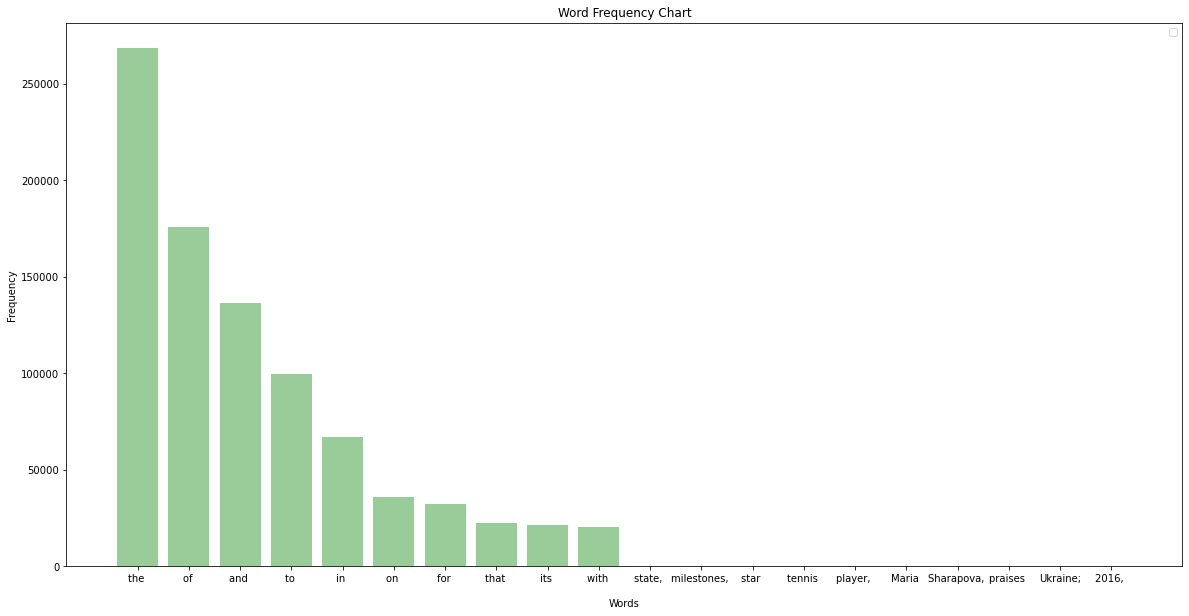

In [229]:
## TODO: ADD YOUR CODE ###
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
pattern = re.compile(r'\w*\D\s',re.IGNORECASE)
peace = pattern.findall(text)

import numpy as np
import matplotlib.pyplot as plt


least = []
most = Counter(peace).most_common(10)
for i in range(10,0,-1):
    least.append(Counter(peace).most_common()[-i])
most_least = most + least
words = [x[0] for x in most_least]
values = [int(x[1]) for x in most_least]

plt.figure(figsize=(20,10)) 
mybar = plt.bar(words, values, color='green', alpha=0.4 )

plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Word Frequency Chart')
plt.legend()
plt.show()

### Q7: (15 pt) Back to the Original Corpus

Get the top 20 (most frequent) words in English, Arabic, Spanish and Russian
of the UNCorpus. Show the lists of words in your answer.

For this task, consider a word to simply be white-space separated (i.e. keep
all punctuation and digits and separate on white space).

In [23]:
## TODO: ADD YOUR CODE ###


### BONUS: Q8: (10 pt) Secret Words
This is a cipher-breaking task.  In the assignment directory, you are provided
with an encrypted English document (doc.crypt.txt).  We know from our spies
that the encryption technique used is the Caesar Cipher.

In [24]:
## TODO: ADD YOUR CODE ###


In [25]:
## TODO: ADD YOUR CODE ###
